# 🌦️Framstiling av værdataanalyse

I denne notebooken finner du er visuell representasjon av dataen vi har innsamlet, sammen med vurderinger og konklusjoner rundt funnene vi har gjort

Innholdsfortegnelse:

[DEl 1 - Datainnsamling](del-1---datainnsamling)

[DEl 2 - Dataanalyse](del-2---dataanalyse)
- [Data rensing](Data-rensing)



---
### 📊Del 1 - Datainnsamling

Denne delen består at tre funskjoner som vi har brukt for å hente data fra Frost og Kaggle, den første koden henter fra Frost, her har vi hentet data ved hjelp av en API-nøkkel. Det siste datasetett er lastet ned lokalt som en CSV, men vi ønsket å gjøre den om til en JSON fil slik at det ble lettere for oss å lese og håndere filen.

For å se kodene bak funksjonene ligger de i 

🔗 [FrostBlindern.py](./FrostBlindern.py)
🔗 [KaggleLondon.py](./KaggleLondon.py)
🔗 [KaggleBoston.py](./KaggleBoston.py)

Det ligger mer informasjon om hvilke metoder vi har brukt og hvorfor under;     
🔗 [Vurderingskriterier2](../docs/Vurderingskriterier2.md)




In [1]:
import os
from dotenv import load_dotenv

#Henter og lagere værdata fra Blindern

# Last .env fra src-mappen (der notebook og .env ligger)
load_dotenv(dotenv_path=os.path.join(os.getcwd(), '.env'))

import sys
sys.path.append(os.getcwd())
from FrostBlindern import hent_og_lagre_data

# Patch exit for notebook
import builtins
builtins.exit = lambda code=0: (_ for _ in ()).throw(SystemExit(code))

# Kjør funksjonen uten å vise returverdien
_= hent_og_lagre_data()

API-nøkkel funnet og data sett lastet inn!
Data saved to 'c:\anvendt_prog\Anvendt_prosjekt\data\observations_data.json'


In [6]:
# Henter og lagrer værdata fra Boston i en CSV
import sys
import os

# Sørg for at data-mappen utenfor src eksisterer før du lagrer CSV
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_dir = os.path.join(project_root, 'data')
os.makedirs(data_dir, exist_ok=True)

sys.path.append(os.getcwd())
from KaggleBoston import hent_boston_data_csv

# Filnavn skal kun være filnavn, ikke path, siden funksjonen lager path selv
hent_boston_data_csv("BostonData2.csv", start_aar=2013, slutt_aar=2023)

Boston-data er hentet og lagret i data-mappen!


In [10]:
import sys
import os

# Bruk korrekt relativ sti til data-mappen utenfor src
csv_path = os.path.abspath(os.path.join("..", "data", "london_weather.csv"))
json_path = os.path.abspath(os.path.join("..", "data", "london_weather.json"))

if not os.path.exists(csv_path):
    print(f"Filen {csv_path} finnes ikke! Sjekk at du har lastet ned eller generert riktig CSV.")
else:
    sys.path.append(os.getcwd())
    from KaggleLondon import csv_til_json_london
    csv_til_json_london(csv_path, json_path)

Konvertert til JSON og lagret som c:\anvendt_prog\Anvendt_prosjekt\data\london_weather.json


---
## ♻️Del 2 - Dataanalyse

### Redegjøring av mangler

I denne delen beskriver vi hvordan vi har avdekket datakvalitetsproblemer, som uteliggere og manglende verdier.
Ved å sammenligne grafer over manglende verdier før rensing og etter datarensing, viser vi tydelig effekten av rengjøringsprosessen.

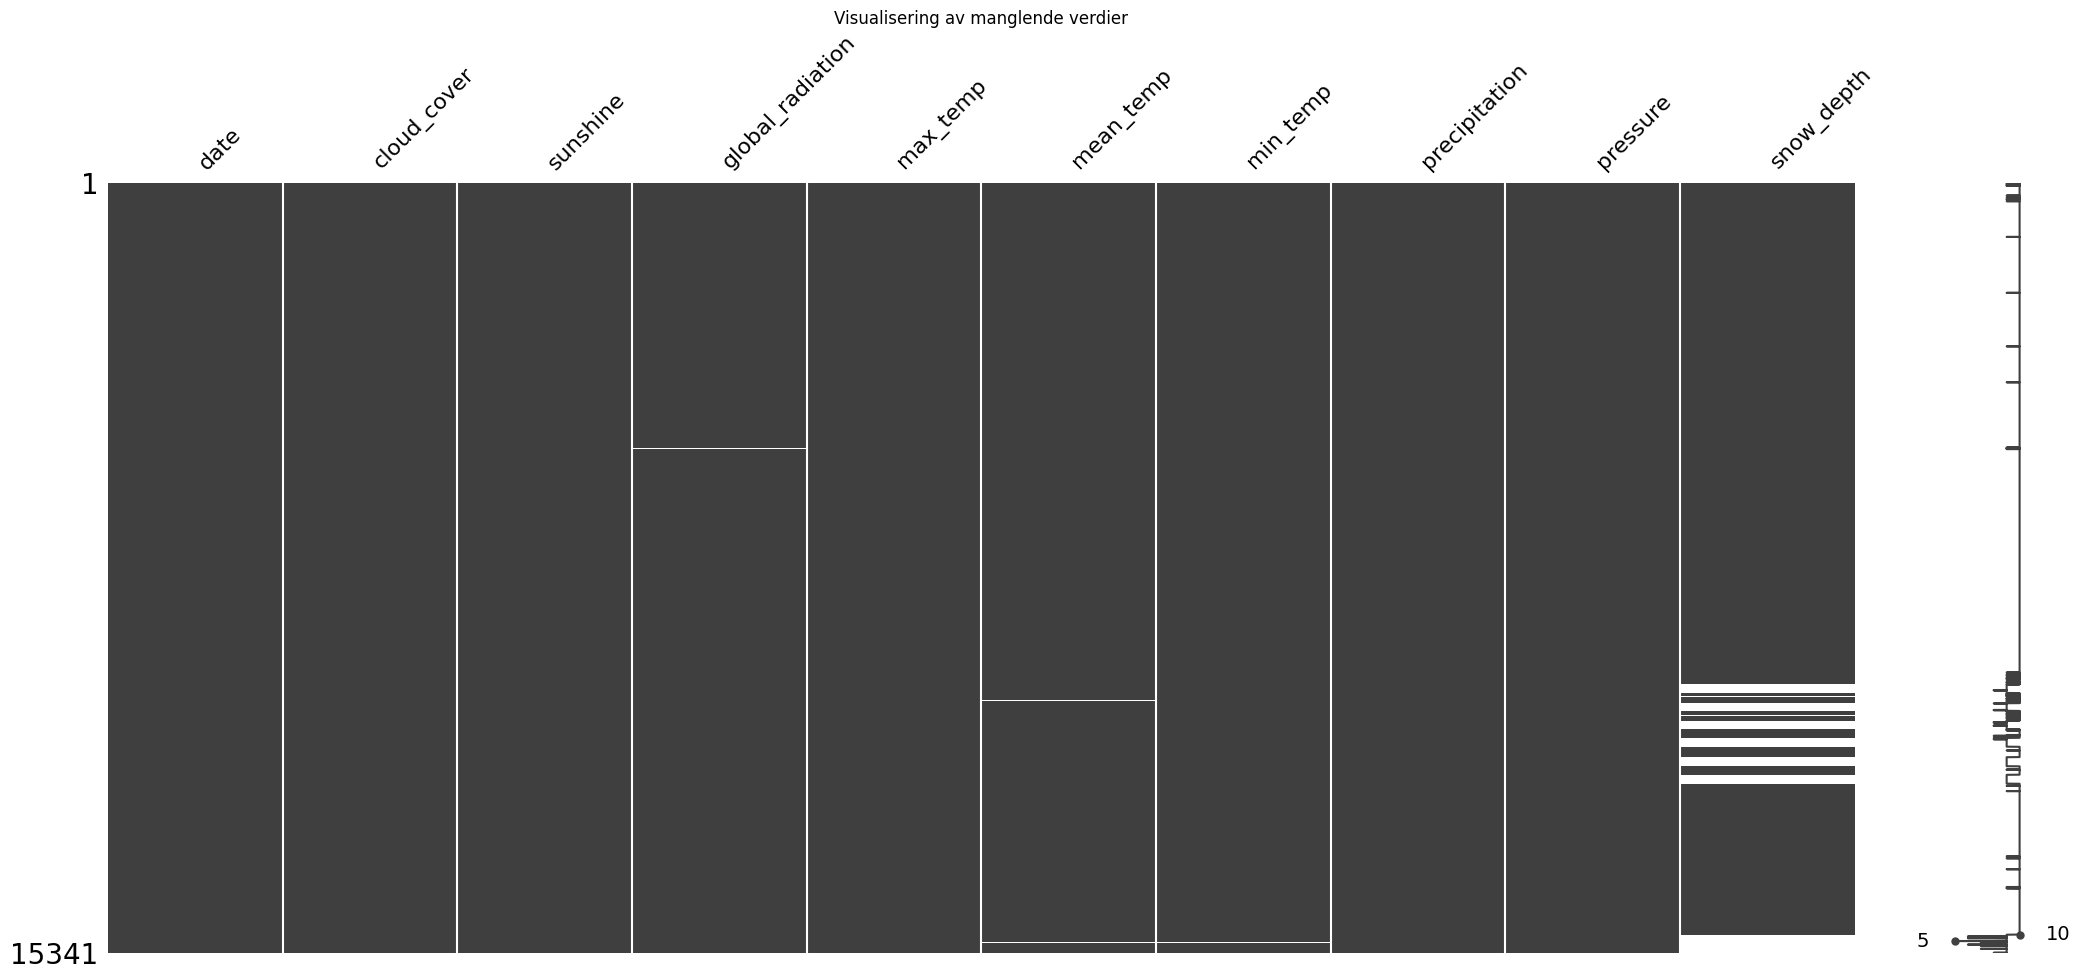

Antall manglende verdier per kolonne:
date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64
Antall rader med minst én manglende verdi: 1498
Eksempel på rader med mangler:
        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
14  19790115          NaN       0.0              15.0       5.9        3.8   
20  19790121          NaN       0.0              16.0       1.5        0.0   
37  19790207          NaN       0.0              21.0       3.7        3.3   
50  19790220          NaN       0.0              27.0       3.6        1.6   
56  19790226          NaN       4.2              82.0       8.9        1.6   

    min_temp  precipitation  pressure  snow_depth  
14       1.0            0.1  102990.0         0.0  
20      -3.5            0.1  102170.0         0

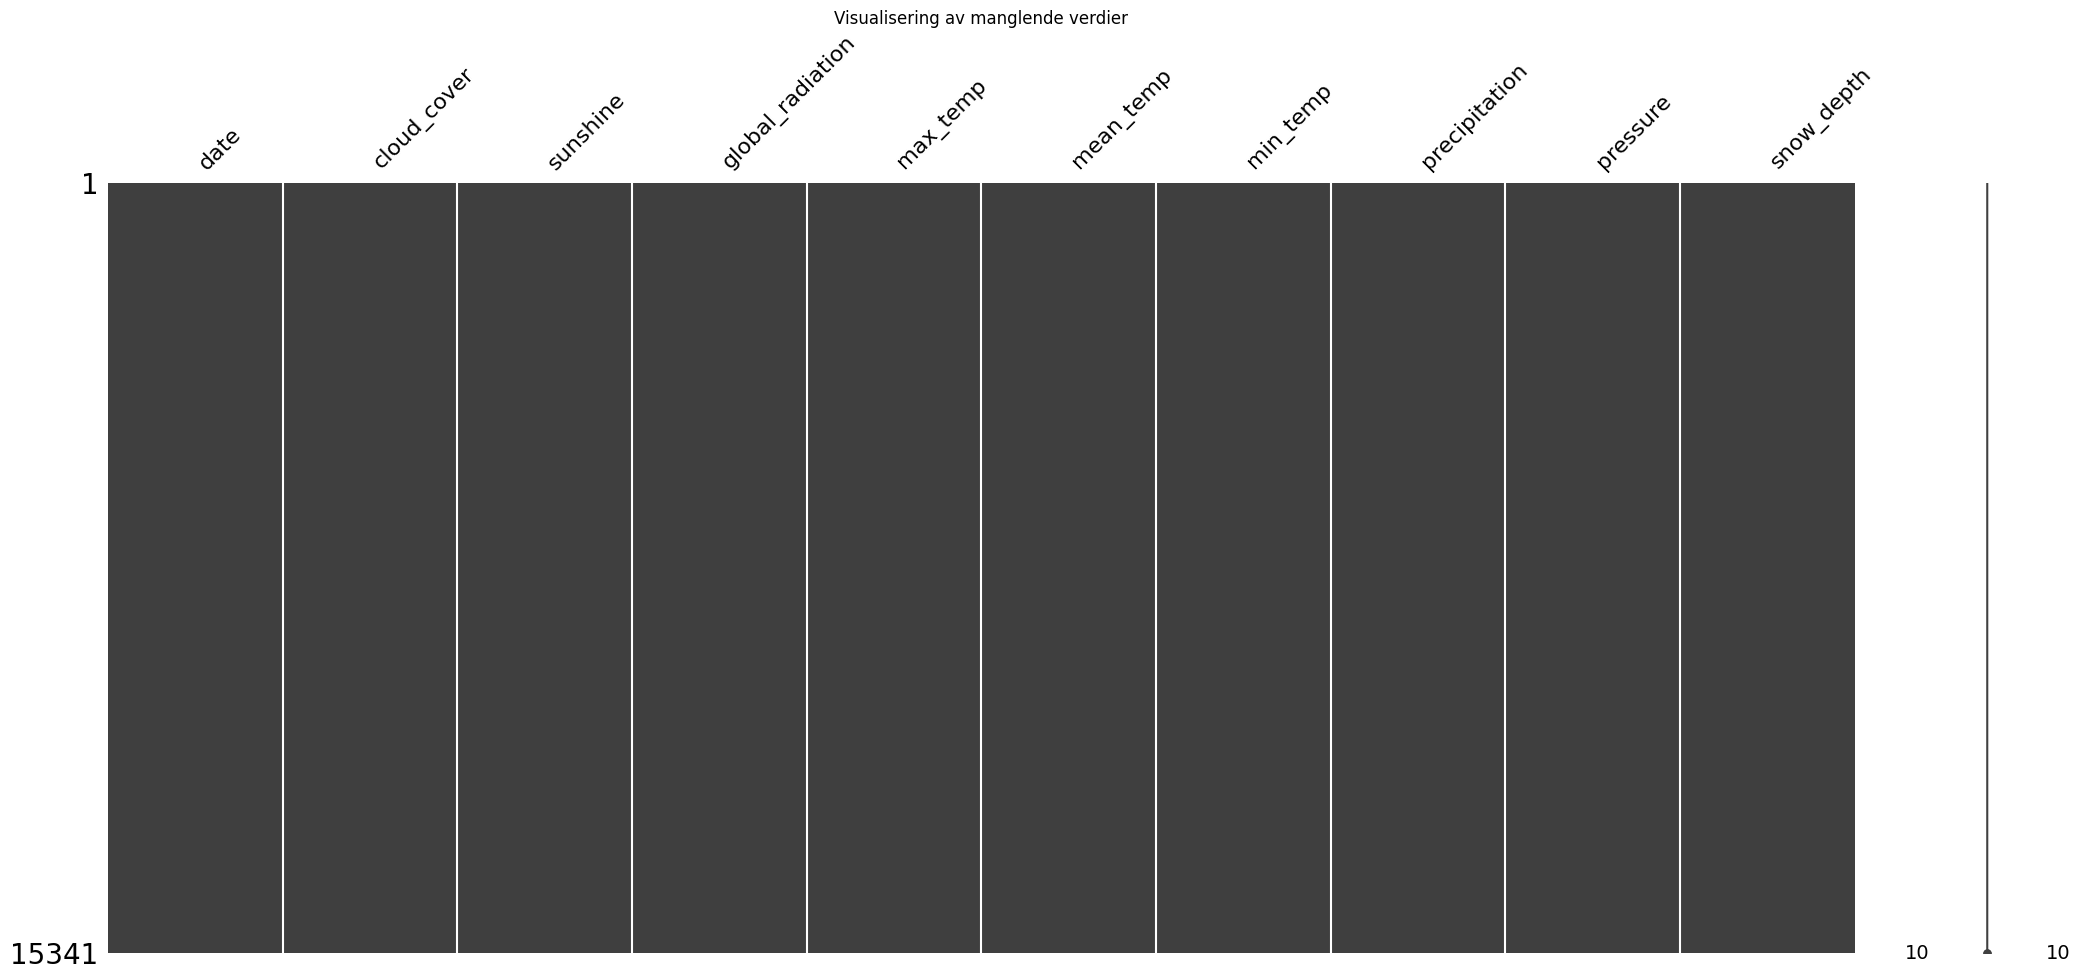

Antall manglende verdier per kolonne:
date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64
Antall rader med minst én manglende verdi: 0
Melted view av manglende verdier:
Empty DataFrame
Columns: [index, variable, value]
Index: []
Oversikt over mangler:
Empty DataFrame
Columns: [variable, missing_count]
Index: []


In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Visualisering.VisualiseringAvMangler import visualiser_og_analyser_mangler

visualiser_og_analyser_mangler(os.path.abspath(os.path.join("..", "data", "london_weather.json")))
visualiser_og_analyser_mangler(os.path.abspath(os.path.join("..", "data", "updated_london_weather.json")))

**Ved hjelp** av missingno.matrix() er det gjennomført en visuell 
inspeksjon av manglende verdier i datasettet. Grafen viser alle 
kolonnene i datasettet vertikalt, og hver rad horisontalt 
representerer en observasjon

Denne visualiseringen gjør det enklere å identifisere hvilke variabler 
som bør håndteres videre – enten ved imputering (f.eks. erstatte med 
gjennomsnitt eller median), ekskludering av rader, eller å vurdere om 
visse kolonner skal fjernes helt dersom de har for mange manglende 
verdier.

**Flere interessante funn kommer frem:**

- Kolonnen `cloud_cover` har en betydelig mengde manglende verdier, noe som antyder at data ikke alltid har vært tilgjengelig eller registrert for denne variabelen.
- `mean_temp` og `min_temp` har noen manglende verdier, men i mindre grad enn `cloud_cover`.
- `snow_depth` har også enkelte manglende verdier, noen rader mangler målinger uten noe tydelig mønster.Dette kan være knyttet til sesongvariasjon eller registreringsfeil.

---
### 🧹Data rensing
**Rensing av London_weather.json**

Som vist ovenfor er det generert en ny datafil under navnet updated_london_weather.json. Denne filen utgjør en uprosessert versjon av den opprinnelige rådatafilen, der vi har:

- Identifisert og håndtert uteliggere
- Imputert og fjernet manglende verdier
- Validert datoformater og fjernet duplikater for å sikre datakonsistens

Resultatet er et kvalitetskontrollert datasett som er klart for videre analyse og modellering.

Koden for data rensing av London_weather ligger her:  
🔗 [clean_weather_data](../src/clean_weather_data.py)

Koden starter med å lese rådata fra london_weather.json og konverterer dem til en Pandas DataFrame. Deretter undersøkes hver av de utvalgte kolonnene for manglende verdier ved hjelp av SQL-spørringer via pandasql, som gir oversikt over hvilke rader som mangler data. For å fange opp uteliggere beregnes grensene enten ut fra forhåndsdefinerte intervaller (bounds) eller basert på 5 %–95 %-kvantiler. Verdier utenfor disse grensene regnes som uteliggere og erstattes med kolonnens gjennomsnitt. Spesielt for snow_depth implementeres en sesongbasert regel: i sommerhalvåret (mars–november) fylles manglende målinger med 0, mens resten av året erstattes de med gjennomsnittet. Etter at alle uteliggere og NaN-verdier er håndtert, fjernes både dupliserte og ugyldige datoer ved hjelp av drop_duplicates og pd.to_datetime. Til slutt lagres den rensede DataFrame-en i filen updated_london_weather.json, klar for videre analyse.

Vi har også generell kode som viser til hvordan finne utligere:

🔗 [Feil og mangler](../src/FeilOgMangler.py)

🔗 [Finn utligere](../src/find_outliers.py)


---
### ⛅Regresjons analyse av to variabler



I denne delen ser vi på hvordan skydekke (cloud_coverage) påvirker solskinn (sunshine). Vi forventer at mer skyer gir mindre sol, og vil derfor regne ut korrelasjonen for å måle styrken i denne sammenhengen. I tillegg kjører vi en enkel regresjonsanalyse og lager et scatterplot for å visualisere mønsteret. Å forstå dette forholdet hjelper oss med å kontrollere at dataene er riktige, og gir innsikt i hvorfor andre værmålinger som stråling og temperatur varierer. Denne grunnleggende analysen legger et godt utgangspunkt for senere prediksjonsmodeller og for å håndtere manglende eller feilaktige målinger.

Link til hele koden:  
🔗 [sammenlign_variabler](../Visualisering/sammenlign_variabler.py)

Skydekke - Gjennomsnitt: 5.27, Median: 6.00, Std: 2.07
Solskinn  - Gjennomsnitt: 4.35, Median: 3.50, Std: 4.03
Korrelasjon mellom skydekke og solskinn: -0.74
Regresjonskoeffisient: -1.44, Intercept: 11.92


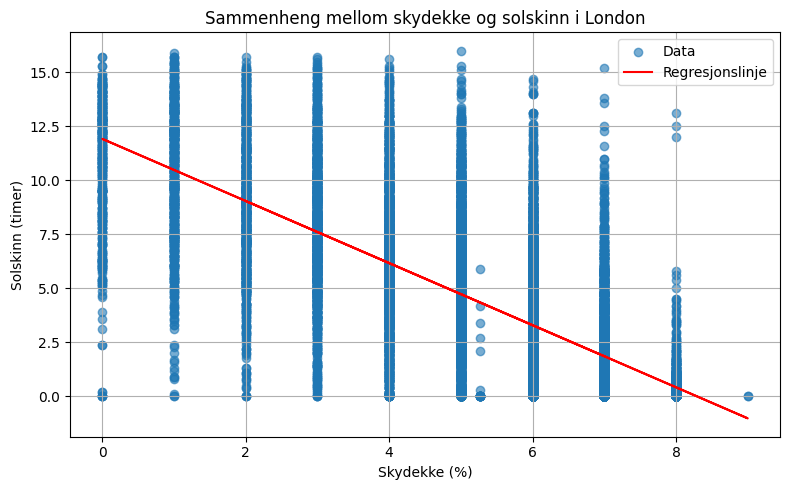

In [17]:

# Importer og bruk funksjonen for analyse av skydekke og solskinn
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Visualisering')))
from sammenlign_variabler import analyser_skydekke_solskinn

# Kjør analysen på renset London-data
analyser_skydekke_solskinn(os.path.abspath(os.path.join('..', 'data', 'updated_london_weather.json')))


Hva dette forteller oss: 

Gjennomsnitt og median gir en indikasjon på hva som er vanlig nivå av skydekke og solskinn, mens standardavvik viser hvor mye verdiene varierer. Dette er nyttig for å forstå fordelingen i datasettet før man gjennomfører videre analyser.

Regresjonsanalysen viser en tydelig negativ sammenheng mellom skydekke og solskinn i London. Dette betyr at jo mer skydekke det er, desto færre soltimer registreres. Regresjonslinjens helning forteller oss hvor mye solskinnet i gjennomsnitt reduseres for hver enhet økning i skydekke. Denne innsikten bekrefter en logisk værmessig sammenheng og gir et godt grunnlag for å forutsi solskinn basert på skydekke.

Analyse viser en relativt sterk negativ sammenheng mellom skydekke og solskinn (korrelasjon –0,74). En lineær regresjonsmodell gir formelen:

sunshine = –1,44 × cloud_coverage + 11,92
Dette betyr at hver prosent økning i skydekke i snitt reduserer solskinnsmengden med 1,44 timer, mens helt klar himmel (0 % skydekke) tilsvarer omtrent 11,9 timer solskinn. Modellen kvantifiserer tydelig hvordan økt skydekke fører til mindre solskinn og er derfor nyttig for å beskrive og forstå værdata.
